In [691]:
import os
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime

In [692]:
#load all data
covid_info=pd.read_csv('C:/Users/Moonwar/Desktop/Dataset/covid_dataset.csv')
first_dose=pd.read_csv('C:/Users/Moonwar/Desktop/Dataset/covid_first_dose.csv')
second_dose=pd.read_csv('C:/Users/Moonwar/Desktop/Dataset/covid_second_dose.csv')

In [693]:
# taking date
covid_info['Day'] = pd.to_datetime(covid_info['Day'], infer_datetime_format=True)
first_dose['Day'] = pd.to_datetime(first_dose['Day'], infer_datetime_format=True)
second_dose['Day'] = pd.to_datetime(second_dose['Day'], infer_datetime_format=True)

In [694]:
#all files date taking in same format 
covid_info['Day'] = covid_info['Day'].dt.strftime('%-d-%m-%Y')
first_dose['Day'] = first_dose['Day'].dt.strftime('%-d-%m-%Y')
second_dose['Day'] = second_dose['Day'].dt.strftime('%-d-%m-%Y')

In [695]:
#outerjoin for merge all data
join1=pd.merge(covid_info, first_dose, on='Day', how='outer')
join2=pd.merge(join1, second_dose, on='Day', how='outer')

In [696]:
#replace Nan values with Zero
join2['Number of Vaccinations (First Dose)'] = join2['Number of Vaccinations (First Dose)'].replace(np.nan, 0)
join2['Number of Vaccinations (Second Dose)'] = join2['Number of Vaccinations (Second Dose)'].replace(np.nan, 0)

In [697]:
#save Joined csv file
#join2.to_csv('join2.csv')

In [698]:
#model buildup
def model_train(x_train,y_train):
    #fitting the data into the model
    model = linear_model.LinearRegression()#Creating instance of linear model
    #sklearn takes input as matrix so the we have to reshape the matrix into colloum matrix
    x_train_for_fittng = np.matrix(x_train.reshape(len(x_train),1))
    y_train_for_fittng = np.matrix(y_train.reshape(len(y_train),1))
    
    #fit the data into the model
    return(model.fit(x_train_for_fittng,y_train_for_fittng))

In [699]:
#Function for Polynomial regrassing function
def poly_regr(X_train,Y_train,degree):
    polynom = PolynomialFeatures(degree=degree)
    X_poly = polynom.fit_transform(X_train.reshape(len(X_train),1))
    polyReg = LinearRegression()
    #Returing the fitted model
    return polyReg.fit(X_poly,Y_train.reshape(len(Y_train),1)) 

In [700]:
#without vaccine

In [701]:
data_without_Vaccine=join2.head(297)

In [702]:
Days_withoutVaccine = np.array(data_without_Vaccine['Day'])
Confirmed_withoutVaccine = np.array(data_without_Vaccine['Confirmed case'])
Deaths_withoutVaccine = np.array(data_without_Vaccine['Death Case'])

In [703]:
data_without_Vaccine.insert(0, 'NDays', range(1, 1 + len(data_without_Vaccine)))

In [704]:
TotalDays_Without_Vaccine = np.array(data_without_Vaccine['NDays'])

In [705]:
random_indices = np.random.permutation(297)

In [706]:
Days_train_without_Vaccine = TotalDays_Without_Vaccine[random_indices[:]]

In [707]:
Confirmed_train_without_Vaccine = Confirmed_withoutVaccine[random_indices[:]]
Deaths_train_without_Vaccine = Deaths_withoutVaccine[random_indices[:]]

In [708]:
#calling the plynomial regrassion model for confirm case
polynom = PolynomialFeatures(degree=4)
model = poly_regr(Days_train_without_Vaccine,Confirmed_train_without_Vaccine,4)
#Printing the model
print(model)

#Pridiction the mode on traning data
predict = model.predict(polynom.fit_transform(Days_train_without_Vaccine.reshape(len(Days_train_without_Vaccine),1)))

LinearRegression()


In [709]:
#Creating Array of custom Days
Days_array_without_vaccine = []
#Creating Days Data for further Prediction
for i in range(1,297):
    Days_array_without_vaccine.append(i) 
#Converting arary into np array    
Days_predict_without_vaccine = np.array(Days_array_without_vaccine)
#Predict the model on Future Date 
predict_Confirm_without_vaccine = model.predict(polynom.fit_transform(Days_predict_without_vaccine.reshape(len(Days_array_without_vaccine),1)))

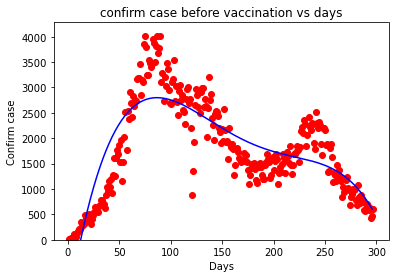

In [710]:
plt.scatter(Days_train_without_Vaccine,Confirmed_train_without_Vaccine,color="red")
plt.plot(Days_predict_without_vaccine,predict_Confirm_without_vaccine,color='blue')
plt.title('confirm case before vaccination vs days')
plt.xlabel('Days')
plt.ylabel('Confirm case')
plt.ylim(ymin=0)
plt.show()

In [711]:
#death case before vaccine

In [712]:
polynom = PolynomialFeatures(degree=4)
model = poly_regr(Days_train_without_Vaccine,Deaths_train_without_Vaccine,4)
#Printing the model
print(model)

#Pridiction the mode on traning data
predict = model.predict(polynom.fit_transform(Days_train_without_Vaccine.reshape(len(Days_train_without_Vaccine),1)))

LinearRegression()


In [713]:
Days_array_without_vaccine = []
#Creating Days Data for further Prediction
for i in range(1,297):
    Days_array_without_vaccine.append(i) 
#Converting arary into np array    
Days_predict_without_vaccine = np.array(Days_array_without_vaccine)
#Predict the model on Future Date 
predict_Confirm_without_vaccine = model.predict(polynom.fit_transform(Days_predict_without_vaccine.reshape(len(Days_array_without_vaccine),1)))

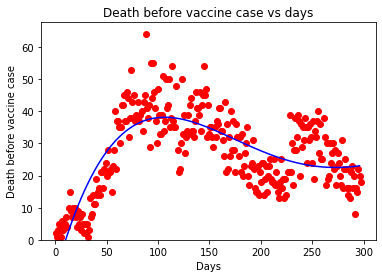

In [714]:
plt.scatter(Days_train_without_Vaccine,Deaths_train_without_Vaccine,color="red")
plt.plot(Days_predict_without_vaccine,predict_Confirm_without_vaccine,color='blue')
plt.title('Death before vaccine case vs days')
plt.xlabel('Days')
plt.ylabel('Death before vaccine case')
plt.ylim(ymin=0)
plt.show()

In [715]:
#after vaccine

In [716]:
Data_after_vaccine=join2.iloc[298:,:]

In [717]:
Days_aftervaccine = np.array(Data_after_vaccine['Day'])
Confirmed_aftervaccine = np.array(Data_after_vaccine['Confirmed case'])
Deaths_aftervaccine = np.array(Data_after_vaccine['Death Case'])

In [718]:
Data_after_vaccine.insert(0, 'NDays', range(1, 1 + len(Data_after_vaccine)))

In [719]:
TotalDays_After_Vaccine = np.array(Data_after_vaccine['NDays'])

In [720]:
random_indices1 = np.random.permutation(329)

In [721]:
Days_train_after_vaccine = TotalDays_After_Vaccine[random_indices[:]]

In [722]:
Confirmed_train_after_vaccine = Confirmed_aftervaccine[random_indices[:]]
Deaths_train_after_vaccine= Deaths_aftervaccine[random_indices[:]]

In [730]:
#calling the plynomial regrassion model for confirm case

polynom = PolynomialFeatures(degree=4)
model = poly_regr(Days_train_after_vaccine,Confirmed_train_after_vaccine,4)
#Printing the model
print(model)

#Pridiction the mode on traning data
predict = model.predict(polynom.fit_transform(Days_train_after_vaccine.reshape(len(Days_train_after_vaccine),1)))


LinearRegression()


In [731]:
Days_array_after_vaccine = []
#Creating Days Data for further Prediction
for i in range(1,300):
    Days_array_after_vaccine.append(i) 
#Converting arary into np array    
Days_predict_after_vaccine = np.array(Days_array_after_vaccine)
#Predict the model on Future Date 
predict_Confirm_after_vaccine = model.predict(polynom.fit_transform(Days_predict_after_vaccine.reshape(len(Days_array_after_vaccine),1)))

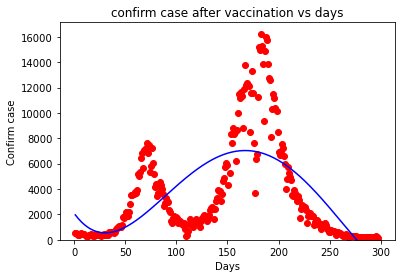

In [732]:
plt.scatter(Days_train_after_vaccine,Confirmed_train_after_vaccine,color="red")
plt.plot(Days_predict_after_vaccine,predict_Confirm_after_vaccine,color='blue')
plt.title('confirm case after vaccination vs days')
plt.xlabel('Days')
plt.ylabel('Confirm case')
plt.ylim(ymin=0)
plt.show()

In [733]:
#death case after vaccine

In [734]:
polynom = PolynomialFeatures(degree=4)
model = poly_regr(Days_train_after_vaccine,Deaths_train_after_vaccine,4)
#Printing the model
print(model)

#Pridiction the mode on traning data
predict = model.predict(polynom.fit_transform(Days_train_after_vaccine.reshape(len(Days_train_after_vaccine),1)))


LinearRegression()


In [735]:
Days_array_after_vaccine = []
#Creating Days Data for further Prediction
for i in range(1,300):
    Days_array_after_vaccine.append(i) 
#Converting arary into np array    
Days_predict_after_vaccine = np.array(Days_array_after_vaccine)
#Predict the model on Future Date 
predict_death_after_vaccine = model.predict(polynom.fit_transform(Days_predict_after_vaccine.reshape(len(Days_array_after_vaccine),1)))

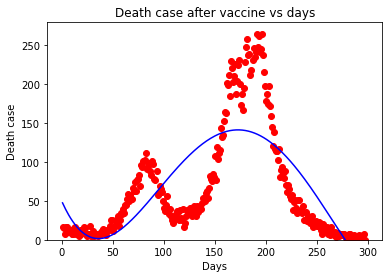

In [736]:
plt.scatter(Days_train_after_vaccine,Deaths_train_after_vaccine,color="red")
plt.plot(Days_predict_after_vaccine,predict_death_after_vaccine,color='blue')
plt.title('Death case after vaccine vs days')
plt.xlabel('Days')
plt.ylabel('Death case')
plt.ylim(ymin=0)
plt.show()

In [737]:
#How many 2nd dose vaccination will be coveder after given days

In [738]:
Second_dose=pd.read_csv('C:/Users/Moonwar/Desktop/Dataset/covid_second_dose.csv')

In [739]:
Second_dose.insert(0, 'NDays', range(1, 1 + len(Second_dose)))

In [740]:
Second_dose.head()

,NDays,Day,Number of Vaccinations (Second Dose)
0,1,2021-04-08,81323.0
1,2,2021-04-10,136703.0
2,3,2021-04-11,165691.0
3,4,2021-04-12,138879.0
4,5,2021-04-13,210579.0


In [741]:
del Second_dose['Day']

In [742]:
Second_dose.head()

,NDays,Number of Vaccinations (Second Dose)
0,1,81323.0
1,2,136703.0
2,3,165691.0
3,4,138879.0
4,5,210579.0


In [743]:
#Second_dose.insert(2, 'Total_covered', range(1, 1 + len(Second_dose)))

In [744]:
Second_dose['Total_covered'] = Second_dose['Number of Vaccinations (Second Dose)'].cumsum()

In [745]:
Second_dose.head()

,NDays,Number of Vaccinations (Second Dose),Total_covered
0,1,81323.0,81323.0
1,2,136703.0,218026.0
2,3,165691.0,383717.0
3,4,138879.0,522596.0
4,5,210579.0,733175.0


In [746]:
import numpy as np

In [747]:
del Second_dose['Number of Vaccinations (Second Dose)']

In [748]:
x=Second_dose.iloc[:,:-1].values
y=Second_dose.iloc[:,-1].values

In [749]:
x

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

In [750]:
y

array([   81323.,   218026.,   383717.,   522596.,   733175.,   930151.,
        1151767.,  1366609.,  1507287.,  1678189.,  1815987.,  1967975.,
        2155296.,  2326866.,  2458223.,  2579084.,  2698155.,  2805694.,
        2936241.,  3023169.,  3106709.,  3210509.,  3313424.,  3401531.,
        3496186.,  3593523.,  3651153.,  3700083.,  3757023.,  3821400.,
        3876836.,  3930751.,  3972218.,  4015522.,  4050375.,  4084030.,
        4121317.,  4142255.,  4161714.,  4173930.,  4186243.,  4193956.,
        4203136.,  4209333.,  4216696.,  4223178.,  4228741.,  4234028.,
        4240856.,  4244997.,  4250167.,  4253526.,  4257499.,  4261067.,
        4264362.,  4266951.,  4270322.,  4273325.,  4276510.,  4279411.,
        4282144.,  4284260.,  4286365.,  4287583.,  4289198.,  4291447.,
        4292150.,  4293201.,  4293944.,  4294837.,  4295418.,  4296069.,
        4296792.,  4297148.,  4297472.,  4297827.,  4298120.,  4298332.,
        4298997.,  4299705.,  4300672.,  4301405., 

In [751]:
import numpy.ma as ma
y=np.where(np.isnan(y), ma.array(y, mask=np.isnan(y)).mean(), y) 

In [752]:
Second_dose.head()

,NDays,Total_covered
0,1,81323.0
1,2,218026.0
2,3,383717.0
3,4,522596.0
4,5,733175.0


In [753]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [754]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
r2_score = regressor.score(x_test,y_test)
print(r2_score*100,'%')

81.364370569855 %


In [755]:
import matplotlib.pyplot as plt

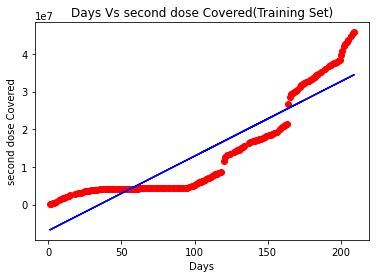

In [756]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Days Vs second dose Covered(Training Set)')
plt.xlabel('Days')
plt.ylabel('second dose Covered')
plt.show()

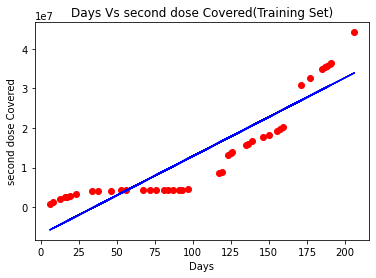

In [757]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,regressor.predict(x_test),color='blue')
plt.title('Days Vs second dose Covered(Training Set)')
plt.xlabel('Days')
plt.ylabel('second dose Covered')
plt.show()